In [1]:
import requests
import json
import pandas as pd
import numpy as np

# Scenario: Marketing Performance

The marketing team at our company uses multiple channels for their campaigns: social media (Facebook), their website(Google Analysis), email campaigns, and paid search (Google Ads). 

Our goal is to load, clean, aggregate and analyze data from these channels to provide insights into overall marketing performance.

## Data Description:

1. **Social Media Engagement (Facebook Graph API)**:
    - **Endpoint**: GET <a href="https://raw.githubusercontent.com/ProgressBG-Python-Course/ProgressBG-Python-Digitall-Slides/gh-pages/pages/themes/BulkMappingUpdateWithPython/examples/MarketingPerformanceDashboardUpdate/API/FacebookGraphAPI.json" target="_blank">https://example.com/api/FacebookGraphAPI.json</a>

    - **Data**: Collects post impressions, reach, likes, comments, and shares.
    - **Example Response**:
      ```json
      {
        "data": [
          {"date": "2023-01-01", "post_impressions": 10000, "post_reach": 7500, "likes": 1200, "comments": 150, "shares": 100},
          {"date": "2023-01-02", "post_impressions": 9500, "post_reach": 7000, "likes": 1100, "comments": 140, "shares": 90}
        ]
      }
      ```
    - Data Description:
      - `date`: The date on which the data was collected, indicating the day's performance for social media posts.
      - `post_impressions`: The total count of times the post was displayed to users, including repeated views by the same users.
      - `post_reach`: The number of unique users who viewed the post. Contrary to impressions, this metric accounts for each user only once.
      - `likes`: The total number of likes received by the post, showing user engagement and approval.
      - `comments`: The total number of comments made on the post, reflecting user interaction and discussion levels.
      - `shares`: The total number of times the post was shared by users, indicating the content's ability to engage users to the extent that they share it with others.

  

2. **Website Traffic (Google Analytics API)**:   
   - **Endpoint**: GET <a href="https://raw.githubusercontent.com/ProgressBG-Python-Course/ProgressBG-Python-Digitall-Slides/gh-pages/pages/themes/BulkMappingUpdateWithPython/examples/MarketingPerformanceDashboardUpdate/API/GoogleAnalyticsAPI.json" target="_blank">https://example.com/api/GoogleAnalyticsAPI.json</a>
   - **Data**: Sessions, pageviews, and users.
   - **Example Response**:
      ```json
      {
        "reports": [
          {
            "columnHeader": {
              "dimensions": ["ga:date"],
              "metricHeader": {
                "metricHeaderEntries": [
                  {"name": "ga:sessions"},
                  {"name": "ga:pageviews"},
                  {"name": "ga:users"}
                ]
              }
            },
            "data": {
              "rows": [
                {"dimensions": ["20230101"], "metrics": [{"values": ["1000", "3000", "900"]}]},
                {"dimensions": ["20230102"], "metrics": [{"values": ["950", "2800", "850"]}]}
              ]
            }
          }
        ]
      }
      ```
    - Data Description:
      - `ga:date`: The date of data collection in YYYYMMDD format.
      - `ga:sessions`: Total number of sessions on the website.
      - `ga:pageviews`: Total number of pages viewed.
      - `ga:users`: Number of unique visitors to the website.


3. **Email Campaign Performance (Mailchimp API)**:    
    - **Endpoint**: GET <a href="https://raw.githubusercontent.com/ProgressBG-Python-Course/ProgressBG-Python-Digitall-Slides/gh-pages/pages/themes/BulkMappingUpdateWithPython/examples/MarketingPerformanceDashboardUpdate/API/MailchimpAPI.json" target="_blank">https://example.com/api/MailchimpAPI.json</a>
    - **Data**: Emails sent, opens, clicks, bounces, and unsubscribes.
    - **Example Response**:
      ```json
      {
        "campaigns": [
          {"id": "campaign_001", "emails_sent": 5000, "opens": 3500, "clicks": 1750, "bounce": 50, "unsubscribe": 25},
          {"id": "campaign_002", "emails_sent": 4500, "opens": 3200, "clicks": 1600, "bounce": 40, "unsubscribe": 20}
        ]
      }
      ```
    - Data Description:
      - `id`: Identifier for the email campaign.
      - `emails_sent`: Total number of emails sent in the campaign.
      - `opens`: Number of times the emails were opened by recipients.
      - `clicks`: Number of times links within the emails were clicked.
      - `bounce`: Number of emails that were not delivered successfully.
      - `unsubscribe`: Number of recipients who opted out of receiving future emails.


4. **Paid Search Metrics (Google Ads API)**:    
    - **Endpoint**: GET <a href="https://raw.githubusercontent.com/ProgressBG-Python-Course/ProgressBG-Python-Digitall-Slides/gh-pages/pages/themes/BulkMappingUpdateWithPython/examples/MarketingPerformanceDashboardUpdate/API/GoogleAdsAPI.json" target="_blank">https://example.com/api/GoogleAdsAPI.json</a>
    - **Data**: Impressions, clicks, cost, and conversions.
    - **Example Response**:
      ```json
      {
        "reports": [
          {"campaignId": "78910", "date": "2023-01-01", "impressions": 12000, "clicks": 800, "cost": 600.00, "conversions": 80},
          {"campaignId": "78911", "date": "2023-01-02", "impressions": 11500, "clicks": 750, "cost": 580.00, "conversions": 75}
        ]
      }
      ```
    - Data Description:
      - `campaignId`: Identifier for the specific paid search campaign.
      - `date`: Date of the data report, indicating when the metrics were recorded.
      - `impressions`: Total number of times the ads were displayed.
      - `clicks`: Number of times the ads were clicked by users.
      - `cost`: Total cost incurred for the campaign on that day.
      - `conversions`: Number of times users completed a desired action after clicking the ad.



## Fetching data

Define a function (fetch_json_data) that will fetches data from API endpoint, which returns JSON data.<br>
Handle posible [Requests Exceptions](https://requests.readthedocs.io/en/latest/api/#exceptions)

In [2]:
def fetch_json_data(endpoint_url):
    """
    Fetches data from API endpoint using the requests library.

    Parameters:
    - endpoint_url (str): The URL of the API endpoint.

    Returns:
    - data (dict): The JSON data fetched from the endpoint.
    """
    try:
        r = requests.get(endpoint_url)
        r.raise_for_status()
        return r.json()
    except requests.HTTPError as e:
        print('HTTP Error')
    except requests.ConnectionError as e:
        print('Connection Error')
    except requests.RequestException as e:
        print('General Request Exception')
    except Exception as e:
        print('Ups, something went wrong!')



In [3]:
# fetch data from Facebook Graph API
url = 'https://raw.githubusercontent.com/ProgressBG-Python-Course/ProgressBG-Python-Digitall-Slides/gh-pages/pages/themes/BulkMappingUpdateWithPython/examples/AnalyseMarketingPerformance/API/FacebookGraphAPI.json'
facebook_data = fetch_json_data(url)

In [4]:
# fetch data from Google Ads API GoogleAdsAPI
url = 'https://raw.githubusercontent.com/ProgressBG-Python-Course/ProgressBG-Python-Digitall-Slides/gh-pages/pages/themes/BulkMappingUpdateWithPython/examples/AnalyseMarketingPerformance/API/GoogleAdsAPI.json'
google_ads_data = fetch_json_data(url)

In [5]:
# fetch data from Google Analytics API
url = 'https://raw.githubusercontent.com/ProgressBG-Python-Course/ProgressBG-Python-Digitall-Slides/gh-pages/pages/themes/BulkMappingUpdateWithPython/examples/AnalyseMarketingPerformance/API/GoogleAnalyticsAPI.json'
google_analytics_data = fetch_json_data(url)

In [6]:
# fetch data from  MailchimpAPI
url = 'https://raw.githubusercontent.com/ProgressBG-Python-Course/ProgressBG-Python-Digitall-Slides/gh-pages/pages/themes/BulkMappingUpdateWithPython/examples/AnalyseMarketingPerformance/API/MailchimpAPI.json'
mailchimp_data = fetch_json_data(url)


## Load data

For facebook, GoogleAds, and Mailchump data we have a flat list of dictionaries structure which is easy to load into df with pd.DataFrame() without any preprocessing.

For GoogleAnalytics data we have deeply nested structure, which can not be parsed directly even with pd.read_json(), thats why we have to manually create the list of columns and flatten rows into a list of lists.

In [7]:
# Load Facebook data into a Pandas DataFrame
if facebook_data:
    facebook_df = pd.DataFrame(facebook_data['data'])

In [8]:
if google_analytics_data:
    # Load GoogleAnalytics data into a Pandas DataFrame
    dimensions_column_name = google_analytics_data['reports'][0]['columnHeader']['dimensions']

    metrics_column_names_dict = google_analytics_data['reports'][0]['columnHeader']['metricHeader']['metricHeaderEntries']
    metrics_column_names = [entry['name'] for entry in metrics_column_names_dict]

    column_names = dimensions_column_name + metrics_column_names

    rows = [
        d['dimensions'] + d['metrics'][0]['values']
        for d in google_analytics_data['reports'][0]['data']['rows']
    ]

google_analytics_df = pd.DataFrame(data=rows, columns=column_names)


In [9]:
# Load GoogleAds data into a Pandas DataFrame
if google_ads_data:
    google_ads_df = pd.DataFrame(google_ads_data['reports'])

In [10]:
# Load Mailchimp data into a Pandas DataFrame
if mailchimp_data:
    mailchimp_df = pd.DataFrame(mailchimp_data['campaigns'])

## Data insights

Output the first 3 rows from each dataframe

In [11]:
facebook_df.head(3)

,date,page_id,post_impressions,post_reach,likes,comments,shares
0,2023-01-01,123456789,10000,7500,1200,150,100
1,2023-01-02,123456789,9500,7000,1100,140,90
2,2023-01-03,123456789,9700,7200,1150,160,95


In [12]:
google_ads_df.head(3)

,campaignId,date,impressions,clicks,cost,conversions
0,78910,2023-01-01,12000,800,600.0,80
1,78911,2023-01-02,11500,750,580.0,75
2,78912,2023-01-03,10000,600,500.0,70


In [13]:
google_analytics_df.head(3)

,ga:date,ga:sessions,ga:pageviews,ga:users
0,20230101,1000,3000,900
1,20230102,950,2800,850
2,20230103,970,2900,870


In [14]:
mailchimp_df.head(3)

,id,date_sent,emails_sent,opens,clicks,bounce,unsubscribe
0,campaign_001,2023-01-01,5000,3500,1750,50,25
1,campaign_002,2023-01-02,4500,3200,1600,40,20
2,campaign_003,2023-01-03,4800,3300,1650,45,22


## Create a unified dataset

We will merge the dataframes into one, using the date field as a common filed.

### Standardize Date Column Names and Values

The date columns have slightly different names across different DataFrames. <br>
Before merging, we should standardize these names. I.e. have only one column named 'date'.

Also, the date values in differents dataframes are not all in standard format, so we will convert all date columns to datetime objects using the pd.to_datetime() method.

In [15]:
facebook_df['date'] = pd.to_datetime(facebook_df['date'], format='ISO8601')
google_ads_df['date'] = pd.to_datetime(google_ads_df['date'], format='ISO8601')
google_analytics_df['date'] = pd.to_datetime(google_analytics_df['ga:date'], format='ISO8601')
mailchimp_df['date'] = pd.to_datetime(mailchimp_df['date_sent'], format='ISO8601')

# remove columns
mailchimp_df.drop(columns='date_sent', errors='ignore', inplace=True)
google_analytics_df.drop(columns='ga:date', errors='ignore', inplace=True)

### Merge data

Now we can merge all dataframes into one, using the date column.

Note, that we have same column name 'clicks' in mailchimp_df, and 'google_ads_df'.

To deal with overlapping column names (except for the keys on which the merge is being performed) pd.merge() method provides `suffixes` parameter, which take a tuple of strings specifing the suffixes to be added to the overlapping column names from the left  and right  dataframes, respectively. 

In [16]:
# Merge Facebook and Google Ads data
df = facebook_df.merge(google_ads_df, on='date', how='inner', suffixes=('_fb', '_g_ads'))

# Merge with Google Analytics data
df = df.merge(google_analytics_df, on='date', how='inner', suffixes=('', '_ga'))

# Merge with Mailchimp data
df = df.merge(mailchimp_df, on='date', how='inner', suffixes=('', '_mc'))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              10 non-null     datetime64[ns]
 1   page_id           10 non-null     object        
 2   post_impressions  10 non-null     int64         
 3   post_reach        10 non-null     int64         
 4   likes             10 non-null     int64         
 5   comments          10 non-null     int64         
 6   shares            10 non-null     int64         
 7   campaignId        10 non-null     object        
 8   impressions       10 non-null     object        
 9   clicks            10 non-null     object        
 10  cost              10 non-null     object        
 11  conversions       10 non-null     object        
 12  ga:sessions       10 non-null     object        
 13  ga:pageviews      10 non-null     object        
 14  ga:users          10 non-null

### Drop irrelevant columns

Next columns: 'page_id', 'campaignId', 'ga:date', 'date_sent', 'id' are irrelevent to our analysis and we will drop them in order to improve clarity, readability and performance.

We will use df.drop() method, passing errors='ignore' to ensure that no error is raised if any of the specified columns do not exist in merged_df.

In [17]:
df.drop(columns=['page_id', 'campaignId', 'ga:date', 'date_sent', 'id'],errors='ignore', inplace=True)
df.head(3)


,date,post_impressions,post_reach,likes,comments,shares,impressions,clicks,cost,conversions,ga:sessions,ga:pageviews,ga:users,emails_sent,opens,clicks_mc,bounce,unsubscribe
0,2023-01-01,10000,7500,1200,150,100,12000,800,600.0,80,1000,3000,900,5000,3500,1750,50,25
1,2023-01-02,9500,7000,1100,140,90,11500,750,580.0,75,950,2800,850,4500,3200,1600,40,20
2,2023-01-03,9700,7200,1150,160,95,10000,600,500.0,70,970,2900,870,4800,3300,1650,45,22


### Rename columns

To improve readability we will remove the 'gs:' prefix in column names, using df.rename() method, passing it a function which returns the replaced string (using str.replace() method)

In [18]:
df.rename( lambda cn:cn.replace('ga:',''), axis=1, inplace=True )
df

,date,post_impressions,post_reach,likes,comments,shares,impressions,clicks,cost,conversions,sessions,pageviews,users,emails_sent,opens,clicks_mc,bounce,unsubscribe
0,2023-01-01,10000,7500,1200,150,100,12000,800,600.0,80,1000,3000,900,5000,3500,1750,50,25
1,2023-01-02,9500,7000,1100,140,90,11500,750,580.0,75,950,2800,850,4500,3200,1600,40,20
2,2023-01-03,9700,7200,1150,160,95,10000,600,500.0,70,970,2900,870,4800,3300,1650,45,22
3,2023-01-04,8800,6700,1050,130,85,9500,650,,65,,3100,890,4700,3400,1700,43,
4,2023-01-05,9200,6900,1080,145,80,10500,700,550.0,,1020,,910,4900,,1600,42,23
5,2023-01-06,9900,7400,1170,155,100,11000,,575.0,68,980,3200,,5100,3500,,48,21
6,2023-01-07,8700,6500,950,120,70,9500,640,525.0,,960,3000,880,4600,3100,1500,,19
7,2023-01-08,9300,7000,1100,150,90,9800,670,,72,990,3050,900,5300,3600,1800,46,
8,2023-01-09,9600,7100,1120,140,85,,690,560.0,74,1010,3100,920,,3450,1725,44,20
9,2023-01-10,8500,6400,1000,125,75,10200,710,590.0,,,,,5200,3550,1775,47,24


## Data Cleaning

### Get data info

Let's get some info at our merged data

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              10 non-null     datetime64[ns]
 1   post_impressions  10 non-null     int64         
 2   post_reach        10 non-null     int64         
 3   likes             10 non-null     int64         
 4   comments          10 non-null     int64         
 5   shares            10 non-null     int64         
 6   impressions       10 non-null     object        
 7   clicks            10 non-null     object        
 8   cost              10 non-null     object        
 9   conversions       10 non-null     object        
 10  sessions          10 non-null     object        
 11  pageviews         10 non-null     object        
 12  users             10 non-null     object        
 13  emails_sent       10 non-null     object        
 14  opens             10 non-null

### Convert to appropriate data types

We notice lots of columns are of object data type, but we know that they represent integers. So we will convert these columns to numerical data type, as this will inrease performance, functionality and memory usage.

For that task, we will use pd.to_numeric() method.

To get all non-numerical columns we can use df.select_dtypes() method, excluding "number" and "datetime" columns. 

In [20]:
objects_column_names =  df.select_dtypes(exclude=['number', 'datetime']).columns.to_list()
df[objects_column_names] = df[objects_column_names].apply( pd.to_numeric, axis=1, errors="raise")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              10 non-null     datetime64[ns]
 1   post_impressions  10 non-null     int64         
 2   post_reach        10 non-null     int64         
 3   likes             10 non-null     int64         
 4   comments          10 non-null     int64         
 5   shares            10 non-null     int64         
 6   impressions       9 non-null      float64       
 7   clicks            9 non-null      float64       
 8   cost              8 non-null      float64       
 9   conversions       7 non-null      float64       
 10  sessions          8 non-null      float64       
 11  pageviews         8 non-null      float64       
 12  users             8 non-null      float64       
 13  emails_sent       9 non-null      float64       
 14  opens             9 non-null 

### Handle NaN Values

#### Show columns containing NaN values:

To identify columns with at least one NaN value we can use isna() method to get a boolean DataFrame indicating whether each value is NaN. Then use any() to check for each column if there's at least one NaN value.

In [21]:
nan_column_names = df.columns[df.isna().any()]
df[nan_column_names]

,impressions,clicks,cost,conversions,sessions,pageviews,users,emails_sent,opens,clicks_mc,bounce,unsubscribe
0,12000.0,800.0,600.0,80.0,1000.0,3000.0,900.0,5000.0,3500.0,1750.0,50.0,25.0
1,11500.0,750.0,580.0,75.0,950.0,2800.0,850.0,4500.0,3200.0,1600.0,40.0,20.0
2,10000.0,600.0,500.0,70.0,970.0,2900.0,870.0,4800.0,3300.0,1650.0,45.0,22.0
3,9500.0,650.0,NaN,65.0,NaN,3100.0,890.0,4700.0,3400.0,1700.0,43.0,NaN
4,10500.0,700.0,550.0,NaN,1020.0,NaN,910.0,4900.0,NaN,1600.0,42.0,23.0
5,11000.0,NaN,575.0,68.0,980.0,3200.0,NaN,5100.0,3500.0,NaN,48.0,21.0
6,9500.0,640.0,525.0,NaN,960.0,3000.0,880.0,4600.0,3100.0,1500.0,NaN,19.0
7,9800.0,670.0,NaN,72.0,990.0,3050.0,900.0,5300.0,3600.0,1800.0,46.0,NaN
8,NaN,690.0,560.0,74.0,1010.0,3100.0,920.0,NaN,3450.0,1725.0,44.0,20.0
9,10200.0,710.0,590.0,NaN,NaN,NaN,NaN,5200.0,3550.0,1775.0,47.0,24.0


#### Deal with NaN values

For "conversions" column, missing data might significantly impact performance evaluation. so we will drop the rows with missing conversions.

For the "unsubscribe" column, assuming that no data could logically mean no unsubscribe actions, we will fill the NaN values with 0.

For rest of the columns, we will fill NaNs with median to maintain the central tendency of the data.

In [22]:
# drop the rows with missing conversions
df.dropna(subset='conversions', inplace=True)


In [23]:
# fill the NaN values in unsubscribe with 0.
df['unsubscribe'] = df['unsubscribe'].fillna(value=0)
df

,date,post_impressions,post_reach,likes,comments,shares,impressions,clicks,cost,conversions,sessions,pageviews,users,emails_sent,opens,clicks_mc,bounce,unsubscribe
0,2023-01-01,10000,7500,1200,150,100,12000.0,800.0,600.0,80.0,1000.0,3000.0,900.0,5000.0,3500.0,1750.0,50.0,25.0
1,2023-01-02,9500,7000,1100,140,90,11500.0,750.0,580.0,75.0,950.0,2800.0,850.0,4500.0,3200.0,1600.0,40.0,20.0
2,2023-01-03,9700,7200,1150,160,95,10000.0,600.0,500.0,70.0,970.0,2900.0,870.0,4800.0,3300.0,1650.0,45.0,22.0
3,2023-01-04,8800,6700,1050,130,85,9500.0,650.0,NaN,65.0,NaN,3100.0,890.0,4700.0,3400.0,1700.0,43.0,0.0
5,2023-01-06,9900,7400,1170,155,100,11000.0,NaN,575.0,68.0,980.0,3200.0,NaN,5100.0,3500.0,NaN,48.0,21.0
7,2023-01-08,9300,7000,1100,150,90,9800.0,670.0,NaN,72.0,990.0,3050.0,900.0,5300.0,3600.0,1800.0,46.0,0.0
8,2023-01-09,9600,7100,1120,140,85,NaN,690.0,560.0,74.0,1010.0,3100.0,920.0,NaN,3450.0,1725.0,44.0,20.0


In [24]:
# fill all rest NaN values with the median of their respective columns
nan_column_names = df.columns[df.isna().any()]

# df['impressions'].fillna( df['impressions'].median() )
df[nan_column_names] = df[nan_column_names].apply( lambda col: col.fillna( df['impressions'].median() ) )

In [25]:
# check again for missing values:
df.isna().any().any()

False

## Analyse data


### Plot the data to observe trends for key metrics

Let our key metrics are 'post_impressions', 'clicks', 'pageviews', 'opens', 'conversions'. <br>
We cat plot line chart to track trends over time, using the 'date' column as x label. <br>
To plot line charts, we will use [df.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) method.

In [26]:
df.head(3)

,date,post_impressions,post_reach,likes,comments,shares,impressions,clicks,cost,conversions,sessions,pageviews,users,emails_sent,opens,clicks_mc,bounce,unsubscribe
0,2023-01-01,10000,7500,1200,150,100,12000.0,800.0,600.0,80.0,1000.0,3000.0,900.0,5000.0,3500.0,1750.0,50.0,25.0
1,2023-01-02,9500,7000,1100,140,90,11500.0,750.0,580.0,75.0,950.0,2800.0,850.0,4500.0,3200.0,1600.0,40.0,20.0
2,2023-01-03,9700,7200,1150,160,95,10000.0,600.0,500.0,70.0,970.0,2900.0,870.0,4800.0,3300.0,1650.0,45.0,22.0


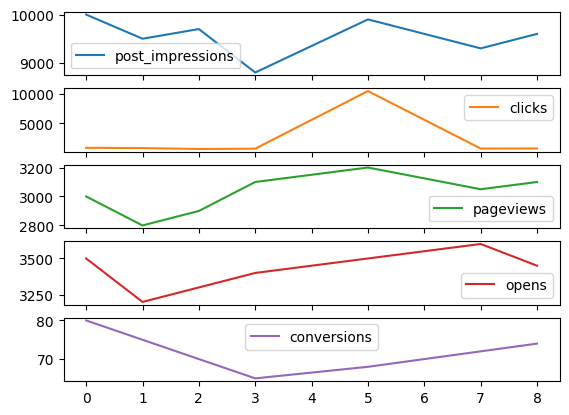

In [27]:
import matplotlib.pyplot as plt
cols_to_plot = [ 'post_impressions', 'clicks', 'pageviews', 'opens', 'conversions' ]

# set date as new rows index
# df.set_index('date', inplace=True)

df.plot(y=cols_to_plot, subplots=True)
plt.show()

### Calculate KPIs (Key Performance Indicators)

We will create a new df (kpi_df), containing important KPIs for our analyses:

#### Social Media Engagement Rate: 

This KPI measures the level of engagement that social media content receives from the audience. 

It is calculated by summing up the "likes", "comments", and "shares" dividing this sum by the  post reach. 

This rate provides insight into how effectively social media content is engaging the target audience, with higher rates indicating more engaging content.

#### Paid Search Conversion Rate: 
This KPI evaluates the effectiveness of paid search campaigns in converting clicks into desired actions, such as purchases or sign-ups. 

It is calculated by dividing the number of conversions by the total number of clicks received by the paid search ads. 

A higher conversion rate suggests that the paid search campaigns are successfully persuading users to take the desired action after clicking an ad.

#### Email Open Rate: 
This KPI assesses the performance of email marketing campaigns by measuring the proportion of sent emails that are opened by recipients. 

It is calculated by dividing the number of opens by the total number of emails sent. 

This rate helps in understanding the initial interest level of recipients towards the email content, with a higher open rate indicating that the emails are likely well-tailored to the audience or have compelling subject lines that encourage opening.

In [28]:
# calculate KPIs and store them in a new DF
kpi_data = {
    'social_media_engagement_rate': (df['likes'] + df['comments'] + df['shares']) / df['post_reach'],
    'paid_search_conversion_rate': df['conversions'] / df['clicks'],
    'email_open_rate': df['opens']/df['emails_sent']
}
kpi_df = pd.DataFrame(kpi_data)
kpi_df

,social_media_engagement_rate,paid_search_conversion_rate,email_open_rate
0,0.193333,0.100000,0.700000
1,0.190000,0.100000,0.711111
2,0.195139,0.116667,0.687500
3,0.188806,0.100000,0.723404
5,0.192568,0.006476,0.686275
7,0.191429,0.107463,0.679245
8,0.189437,0.107246,0.328571


### Plot bar chart to compare KPI metrics

To visualize Average KPIs Across Marketing Channels we can use df.plot(kind='bar').

<Axes: >

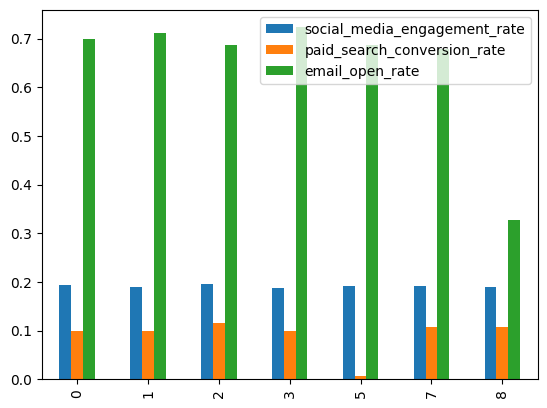

In [29]:
kpi_df.plot.bar()

## Save data

### To csv file

In [30]:
csv_filename = './data/kpi.csv'
kpi_df.to_csv(csv_filename, index=False, sep=';')

### To Excell

In [31]:
exls_filename = './data/kpi.xlsx'
kpi_df.to_excel(exls_filename, engine='openpyxl')

### To JSON

In [32]:
json_filename = './data/kpi.json'
data_dict = kpi_df.to_dict(orient='list')
print( data_dict )

with open('./data/kpi.json', 'w') as f:
    json.dump(data_dict, f)

{'social_media_engagement_rate': [0.19333333333333333, 0.19, 0.1951388888888889, 0.18880597014925374, 0.19256756756756757, 0.19142857142857142, 0.18943661971830986], 'paid_search_conversion_rate': [0.1, 0.1, 0.11666666666666667, 0.1, 0.0064761904761904765, 0.10746268656716418, 0.1072463768115942], 'email_open_rate': [0.7, 0.7111111111111111, 0.6875, 0.723404255319149, 0.6862745098039216, 0.6792452830188679, 0.32857142857142857]}


### TO REST API Server (github)

In [33]:
# Store succesfully uploaded file's SHAs for further update
uploaded = dict()

In [34]:
import requests
import base64

def upload_file(file_path, api_endpoint, token):
    """ Upload file to github api

    API docs:https://docs.github.com/en/rest/repos/contents?apiVersion=2022-11-28#create-or-update-file-contents

    Args:
        file_path (_type_): _description_
        api_endpoint (_type_): _description_
        token (_type_): _description_
    """
    with open(file_path, 'rb') as f:
        data = f.read()

    encoded_data = base64.b64encode(data).decode('utf-8')

    payload = {
        "message": "Upload file via API",
        "content": encoded_data
    }
    # if file was once uploaded, use saved sha to update it
    sha = uploaded.get(file_path)
    if sha:
        payload['sha'] = sha

    headers = {
        "Authorization": f"Bearer {token}",     # Use Bearer authentication
        "Accept": "application/vnd.github+json" ,
        "X-GitHub-Api-Version": "2022-11-28"
    }

    # print(payload)
    response = requests.put(api_endpoint, headers=headers, json=payload)

    if response.status_code == 201:
        data = response.json()
        sha = data['content']['sha']
        uploaded[file_path] = sha
        print("File uploaded successfully!")
    else:
        print("Upload failed:", response.text)



if __name__ == "__main__":
    # --------  Configuration --------
    file_to_upload = "./data/kpi.json"
    api_endpoint = "https://api.github.com/repos/ProgressBG-Python-Course/Shared/contents/kpi666.json"
    token = "YOUR API TOKEN HERE"

    # -------- Usage --------
    upload_file(file_to_upload, api_endpoint, token)

{'message': 'Upload file via API', 'content': 'eyJzb2NpYWxfbWVkaWFfZW5nYWdlbWVudF9yYXRlIjogWzAuMTkzMzMzMzMzMzMzMzMzMzMsIDAuMTksIDAuMTk1MTM4ODg4ODg4ODg4OSwgMC4xODg4MDU5NzAxNDkyNTM3NCwgMC4xOTI1Njc1Njc1Njc1Njc1NywgMC4xOTE0Mjg1NzE0Mjg1NzE0MiwgMC4xODk0MzY2MTk3MTgzMDk4Nl0sICJwYWlkX3NlYXJjaF9jb252ZXJzaW9uX3JhdGUiOiBbMC4xLCAwLjEsIDAuMTE2NjY2NjY2NjY2NjY2NjcsIDAuMSwgMC4wMDY0NzYxOTA0NzYxOTA0NzY1LCAwLjEwNzQ2MjY4NjU2NzE2NDE4LCAwLjEwNzI0NjM3NjgxMTU5NDJdLCAiZW1haWxfb3Blbl9yYXRlIjogWzAuNywgMC43MTExMTExMTExMTExMTExLCAwLjY4NzUsIDAuNzIzNDA0MjU1MzE5MTQ5LCAwLjY4NjI3NDUwOTgwMzkyMTYsIDAuNjc5MjQ1MjgzMDE4ODY3OSwgMC4zMjg1NzE0Mjg1NzE0Mjg1N119'}
Upload failed: {"message":"Bad credentials","documentation_url":"https://docs.github.com/rest"}
{}
